# TASKS HANDS ON UNIMED

***

SEARCH BASE W/ MISSING VALUES
- UCI ML REPO
- Datasets: Titanic.SCV & SkillCraft1_Dataset.csv
- More missing values, randomize. -- DONE


DATASETS DIFERENTES PARA CADA TAREFA

HANDS ON:
- Task 1 - fill.na -- DONE
            . Use drop, fill(mean), fill(median)
            . Compare results
- norm [0,1] &  PCA -- DONE
- Norm. Gaussiana & PCA -- DONE
- check diff entre normalizações -- DONE
- Discretização de valores -- DONE
- feature selec. 
        . information gain - decision tree
        . gini - random forest
        . isomap
        . tsne
- compare FeatSelec & Disc.

![](unimed.png)

---
## Exercícios sobre tratamendo de dados

Descrição dos Dados:   https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Os dados estarão disponíveis no arquivo **winequality-red.csv**


Agora vamos botar a mão na massa. Usaremos um novo DataSet para aplicar o que aprendemos hoje: tratamento de valores faltantes, discretização, normalização, PCA, Feature Selection e Dimensionality Reduction. Usaremos bilbiotecas como numpy, pandas e scikit-learn.

Agora vamos botar a mão na massa. Usaremos um novo DataSet para aplicar o que aprendemos hoje: tratamento de valores faltantes, discretização, normalização, PCA, Feature Selection e Dimensionality Reduction.

## Importação de bibliotecas e Carregamento do DataSet

In [17]:
"""Importe as bibliotecas que usaremos,como numpy, pandas, matplotib, etc"""
#YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

"""Agora, leia o arquivo CSV winequality-red.csv e salve em uma variável"""
#YOUR CODE HERE
data = pd.read_csv('winequality-red.csv')

Veja agora como são os dados do DataSet e algumas caracteristicas deles. Funções .head( ) e .describe( ) podem ajudar.

In [18]:
#YOUR CODE HERE
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,NaN,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,NaN,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,NaN,NaN,NaN,NaN,6
4,NaN,0.70,0.00,NaN,NaN,11.0,34.0,NaN,3.51,0.56,9.4,5


In [19]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1194.000000,1180.000000,1180.000000,1208.000000,1169.000000,1176.000000,1168.000000,1197.000000,1165.000000,1167.000000,1161.000000,1599.000000
mean,8.322111,0.530267,0.274407,2.549255,0.087334,15.837585,46.471747,0.996714,3.313416,0.656598,10.437152,5.636023
std,1.751172,0.180380,0.194692,1.467529,0.048913,10.361980,33.708801,0.001890,0.149696,0.164079,1.070860,0.807569
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,21.750000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.432500,2.600000,0.090000,21.000000,61.000000,0.997860,3.400000,0.720000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Pode-ser ver que nem todos os dados estão presentes. Temos muitos dados faltantes. Pense na maneira mais adequada de preenche-los. Podemos usar média, mediana, remoção...

In [20]:
#YOUR CODE HERE
data.fillna(np.mean(data),inplace=True)

In [21]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.322111,0.530267,0.274407,2.549255,0.087334,15.837585,46.471747,0.996714,3.313416,0.656598,10.437152,5.636023
std,1.513075,0.154937,0.167231,1.275416,0.041817,8.885324,28.806490,0.001635,0.127761,0.140157,0.912375,0.807569
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.300000,0.430000,0.160000,2.000000,0.074000,10.000000,27.000000,0.996035,3.260000,0.580000,9.800000,5.000000
50%,8.322111,0.530267,0.274407,2.400000,0.086000,15.837585,46.471747,0.996714,3.313416,0.656598,10.437152,6.000000
75%,8.700000,0.600000,0.370000,2.549255,0.087334,18.000000,49.000000,0.997360,3.370000,0.680000,10.800000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Antes de normalizar os dados do DataSet, devemos retirar nosso **Target**, representado pela coluna **quality**, pois esse não deve ser normalizado. Lembre-se de salvá-lo. Ainda será muito util.

In [22]:
#YOUR CODE HERE
target = data['quality']
data.drop('quality',axis=1,inplace=True)
target

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Percebe-se que nossos dados se encontram em dominios muito diferentes. Isso pode ser prejudicial para o modelo que queremo usar. Vamos Normalizá-los utilizando normalização **MaxMin** e **Gaussiana**. <br>
Podemos usar a função **.describe( )** e até histogramas para termos uma noção melhor dos dados normalizados.

In [26]:
#Media MaxMin [0,1]
#YOUR CODE HERE
from sklearn import preprocessing
X = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(X)
data_minmax = pd.DataFrame(data_minmax,columns=data.columns)
data_minmax.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.241071,0.397260,0.00,0.068493,0.106845,0.149254,0.143010,0.567548,0.565217,0.137725,0.153846
1,0.276786,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.295652,0.209581,0.215385
2,0.276786,0.281005,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.347826,0.191617,0.215385
3,0.580357,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.487845,0.394275,0.195568,0.313408
4,0.323403,0.397260,0.00,0.112963,0.125766,0.149254,0.098940,0.487845,0.565217,0.137725,0.153846


In [ ]:
#YOUR CODE HERE

In [31]:
#Media Gaussiana Z-Score
#YOUR CODE HERE
X = data.values
std_sc = preprocessing.StandardScaler()
data_std = std_sc.fit_transform(X)
data_std = pd.DataFrame(data_std,columns=data.columns)
data_std.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-6.096187e-01,1.095838,-1.641396,-5.092127e-01,-2.711122e-01,-0.544617,-2.467378e-16,6.639863e-01,1.539169e+00,-6.894303e-01,-1.137117e+00
1,-3.451738e-01,2.257962,-1.641396,3.979949e-02,2.551512e-01,1.031508,7.128489e-01,5.233055e-02,-8.880027e-01,1.670216e-01,-6.985630e-01
2,-3.451738e-01,0.000000,-1.402132,-1.954915e-01,1.116248e-01,-0.094296,2.614206e-01,1.746617e-01,-4.182276e-01,-4.709140e-02,-6.985630e-01
3,1.902608e+00,-1.615784,1.708309,-5.092127e-01,-2.950332e-01,0.130865,4.697721e-01,4.074446e-13,2.781628e-14,4.754263e-15,-1.363298e-14
4,9.394972e-15,1.095838,-1.641396,6.966012e-16,-6.307457e-15,-0.544617,-4.330846e-01,4.074446e-13,1.539169e+00,-6.894303e-01,-1.137117e+00


In [32]:
data_std.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.39,-2.65,-1.64,-1.29,-1.80,-1.67,-1.41,-4.06,-3.55,-2.33,-2.23
25%,-0.68,-0.65,-0.68,-0.43,-0.32,-0.66,-0.68,-0.42,-0.42,-0.55,-0.70
50%,0.00,0.00,-0.00,-0.12,-0.03,0.00,-0.00,0.00,0.00,0.00,-0.00
75%,0.25,0.45,0.57,0.00,-0.00,0.24,0.09,0.39,0.44,0.17,0.40
max,5.01,6.78,4.34,10.16,12.53,5.87,8.42,4.27,5.45,9.59,4.89


### PCA

Agora vamos utilizar o PCA para reduzir a dimensionalidade dos nossos dados.

O PCA é uma ferramenta importante usada em datasets com muitos atributos, sendo capaz de reduzir sua dimensionalidade analisando seus componentes principais, para que possamos usa-los em nosso modelo garantindo eficiencia sem muita perda de informação.

Inicialmente, vamos nos guiar pela documentação da biblioteca, que você pode acessar clicando <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">aqui</a>.

Em um primeiro momento, não devemos passar nenhum valor para o parâmetro **n_components**, dessa forma, podemos visualizar todos os componentes principais gerados e posteriormente decidirmos o número de componentes a serem utilizados.

Normal gaussiana: 

[0.22787682 0.15318879 0.13266042 0.10790446 0.09063611 0.06549805
 0.06160742 0.05186461 0.0437307  0.03676518 0.02826745]
[0.22787682 0.38106561 0.51372603 0.62163048 0.71226659 0.77776464
 0.83937206 0.89123667 0.93496737 0.97173255 1.        ]
Normal MinMax: 

[0.29440255 0.17268115 0.14674494 0.07973241 0.06532539 0.05407323
 0.04988725 0.04731783 0.03807335 0.03013143 0.02163047]
[0.29440255 0.4670837  0.61382864 0.69356105 0.75888644 0.81295966
 0.86284692 0.91016475 0.9482381  0.97836953 1.        ]
Sem Normalizacao: 

[9.31882727e-01 6.29388188e-02 2.53277657e-03 1.67804167e-03
 8.85613105e-04 3.42960553e-05 1.92717044e-05 1.52120400e-05
 1.17053640e-05 1.53596901e-06 1.70153704e-09]
[0.93188273 0.99482155 0.99735432 0.99903236 0.99991798 0.99995227
 0.99997154 0.99998676 0.99999846 1.         1.        ]


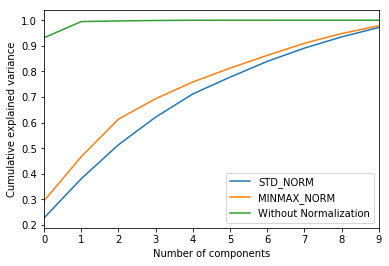

In [46]:
"""Importe a função PCA da biblioteca sklearn"""
#YOUR CODE HERE
from sklearn.decomposition import PCA
"""Crie uma variável pca que receba a função PCA(), em seguida treine o modelo com seus dados 
e analise a porcentagem de variância explicada por cada componente principal.
Dica: arrays possuem a função .cumsum() que permite visualizar o valor acumulativos de seus itens."""

"""Aplique a PCA para o DataSet e para cada normalização que fizemos"""
"""Pode ser uma boa idea fazer um plot com as 3 curvas para
compararmos como as normalizações afetam as variâncias"""
#YOUR CODE HERE

X = data_std.values
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'STD_NORM')
print("Normal gaussiana: " + "\n")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

X = data_minmax.values
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'MINMAX_NORM')
print("Normal MinMax: " + "\n")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

X = data.values
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Without Normalization')
print("Sem Normalizacao: " + "\n")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

plt.xlim(0,9,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend()



In [36]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[9.31882727e-01 6.29388188e-02 2.53277657e-03 1.67804167e-03
 8.85613105e-04 3.42960553e-05 1.92717044e-05 1.52120400e-05
 1.17053640e-05 1.53596901e-06 1.70153704e-09]
[0.93188273 0.99482155 0.99735432 0.99903236 0.99991798 0.99995227
 0.99997154 0.99998676 0.99999846 1.         1.        ]


Baseando-se na análise realizada acima, já podemos reduzir a dimensionalidade de nossos dados. Agora o parâmetro **n_components** deve ser alterado recebendo como valor o número de componentes principais necessários para explicar no mínimo 90% da variância dos dados. Após a alteração do parâmetro, o modelo deve ser retreinado e em seguida, podemos realizar a transformação dos dados.

In [37]:
"""Crie uma nova variável chamada data_pca, a variável deverá receber os dados transformados pelo PCA,
contendo componentes principais suficientes para explicar 97% da variância dos dados."""
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data)

### Feature Selection

Para a parte de **Feature Selection** usaremos técinas para selecionar os melhores atributos do nosso DataSet que possam ser usados em nosso modelo de maneira mais eficiente e que representem melhor sua totalidade.

Inicialmente vamos usar ferramentas da biblioteca **sklearn** para selecionar as N melhores features do nosso DataSet. Através do calculo do PCA já temos uma idea de quais são as melhores features para usarmos no nosso modelo.

In [39]:
"""Utilize SelectKBest e chi2 para calcular os scores 
das melhores features"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_minmax

best_feat = SelectKBest(score_func=chi2,k=8)
fit = best_feat.fit(X,target)


#YOUR CODE HERE

In [40]:
"""Crie um novo DataSet relacionando as features com seu 
respectivo score calculado e imprima as 8 melhores features."""
data_score = pd.DataFrame(fit.scores_)
data_col = pd.DataFrame(data.columns)

featScore = pd.concat([data_col,data_score],axis=1)
featScore.columns = ['Specs','Score']
print(featScore.nlargest(8,'Score'))
#YOUR CODE HERE

                   Specs      Score
10               alcohol  19.702974
1       volatile acidity   8.812523
2            citric acid   7.005209
6   total sulfur dioxide   6.733005
9              sulphates   3.058814
7                density   1.479327
0          fixed acidity   1.267637
5    free sulfur dioxide   1.114246


[0.07950608 0.09105274 0.08171363 0.08277078 0.08471019 0.08136388
 0.10600541 0.08654143 0.07566054 0.09999781 0.1306775 ]


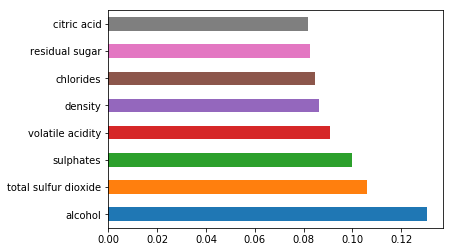

In [44]:
"""Utilize agora a função ExtraTreesClassifier para recalcular
o score de cada feature e imprima as 8 melhores features"""
#YOUR CODE HERE
X = data_minmax

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,target)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=data.columns)
feat_importances.nlargest(8).plot(kind='barh')

Agora temos uma noção de quais features são as mais importantes para o modelo, podemos definir um limiar de score maior que 0.10. Vamos agora aplicar o PCA mais uma vez porem somente às variaveis mais relevantes.

Normal MinMax: 

[0.54139871 0.27124674 0.18735456]
[0.54139871 0.81264544 1.        ]


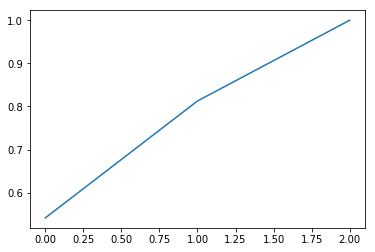

In [47]:
"""Selecione as colunas das features mais importantes do nosso DataSet 
normalizado e aplique o PCA mais uma vez"""
#YOUR CODE HERE

X = data_minmax[['alcohol','total sulfur dioxide','sulphates']].values
pca = PCA()
data = pca.fit_transform(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'MINMAX_NORM')
print("Normal MinMax: " + "\n")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())